<a href="https://colab.research.google.com/github/klisman02/Data-Analysis-Project/blob/main/metricas_de_avaliacao_de_aprendizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc
)

In [2]:
# --- Exemplo de dados (rótulos verdadeiros e previsões do modelo) ---
y_true = [1, 1, 1, 0, 0, 0, 1, 0, 1, 0]   # valores reais
y_pred = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]   # previsões (classificação)
y_prob = [0.9, 0.4, 0.8, 0.2, 0.1, 0.7, 0.95, 0.3, 0.85, 0.05] # probabilidades (para ROC)

In [3]:
# --- Matriz de confusão ---
cm = confusion_matrix(y_true, y_pred)
VP, FN, FP, VN = cm[1,1], cm[1,0], cm[0,1], cm[0,0]

In [4]:
print("Matriz de Confusão:")
print(cm)
print(f"\nVP={VP}, FN={FN}, FP={FP}, VN={VN}")

Matriz de Confusão:
[[4 1]
 [1 4]]

VP=4, FN=1, FP=1, VN=4


In [5]:
# --- Métricas ---
acuracia = accuracy_score(y_true, y_pred)
precisao = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)  # sensibilidade
f1 = f1_score(y_true, y_pred)
especificidade = VN / (VN + FP)

In [6]:
print("\nMétricas:")
print(f"Acurácia: {acuracia:.2f}")
print(f"Precisão: {precisao:.2f}")
print(f"Sensibilidade (Recall): {recall:.2f}")
print(f"Especificidade: {especificidade:.2f}")
print(f"F1-Score: {f1:.2f}")


Métricas:
Acurácia: 0.80
Precisão: 0.80
Sensibilidade (Recall): 0.80
Especificidade: 0.80
F1-Score: 0.80


In [7]:
# --- Curva ROC ---
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

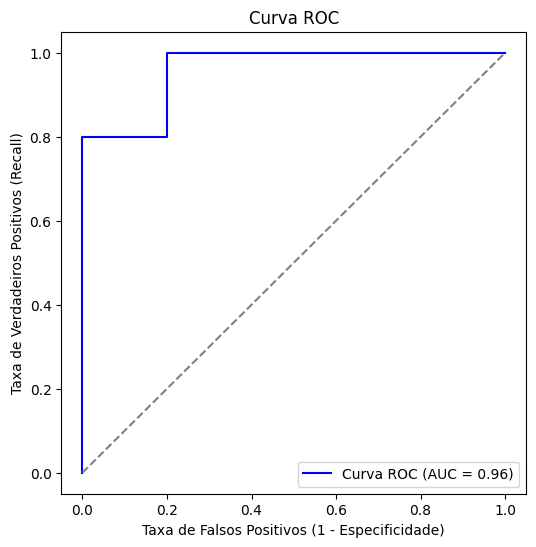

In [8]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="gray", linestyle="--")
plt.xlabel("Taxa de Falsos Positivos (1 - Especificidade)")
plt.ylabel("Taxa de Verdadeiros Positivos (Recall)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()